# Introduction to Machine Learning - Course Project

### imports

In [852]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import time
from scipy import stats

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split, KFold
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay, roc_curve, auc
from sklearn import tree
from sklearn import svm

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from IPython.display import display, HTML
from typing import Callable

## Part 1 - Exploration

#### Utils functions

In [853]:
def print_general_data_exploration(data):
  print('\n \033[1m All of the data:\033[0m')
  display(data)
  print('\n \033[1m 10 first rows: \033[0m')
  display(data.head(10))
  print('\n \033[1m Description:\033[0m')
  display(data.iloc[:,1:].describe())
  print('\n \033[1m Shape:\033[0m ')
  display(data.shape)
  print('\n \033[1m Labels:\033[0m ')
  display(data.columns[1:])
  print('\n \033[1m Data types:\033[0m ')
  display(data.dtypes)

In [854]:
# loading the train dataset
data=pd.read_csv("train.csv")

In [855]:
print_general_data_exploration(data)


  All of the data:


,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,...,device,internet_browser,Region,user_type,Weekend,A,B,C,D,purchase
0,0,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,...,1.0,safari_15,1.0,Returning_Visitor,False,c_1,118.880094,log202,NaN,0
1,1,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,0.000000,0.200000,0.200000,...,4.0,safari_14,9.0,Returning_Visitor,False,c_3,113.358423,log404,NaN,0
2,2,0.0,0.0,0.0,NaN,NaN,627.5 minutes,627.500000,0.020000,0.050000,...,3.0,browser_3_v17,1.0,Returning_Visitor,True,c_4,121.507695,log202,NaN,0
3,3,0.0,0.0,0.0,0.0 minutes,19.0,154.2166667 minutes,154.216667,0.015789,0.024561,...,2.0,chrome_99.1.3,1.0,Returning_Visitor,False,c_3,93.747176,log_100,NaN,0
4,4,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,...,2.0,edge_96.0.1054.75,3.0,Returning_Visitor,False,c_3,99.545824,log202,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10474,10474,3.0,145.0,0.0,0.0 minutes,53.0,1783.791667 minutes,1928.791667,0.007143,0.029031,...,4.0,browser_6_v12,1.0,Returning_Visitor,True,c_1,79.548460,log400,NaN,0
10475,10475,0.0,0.0,0.0,0.0 minutes,5.0,465.75 minutes,NaN,0.000000,0.021333,...,3.0,chrome_98.0.1,1.0,Returning_Visitor,True,c_8,99.457255,log202,NaN,0
10476,10476,0.0,0.0,0.0,0.0 minutes,6.0,184.25 minutes,NaN,0.083333,0.086667,...,3.0,chrome_99.1.3,1.0,Returning_Visitor,True,c_13,94.417344,log8080,NaN,0
10477,10477,4.0,75.0,0.0,0.0 minutes,15.0,346.0 minutes,NaN,0.000000,0.021053,...,2.0,chrome_80,3.0,Returning_Visitor,False,c_11,108.919057,log400,NaN,0



  10 first rows: 


,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,...,device,internet_browser,Region,user_type,Weekend,A,B,C,D,purchase
0,0,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,...,1.0,safari_15,1.0,Returning_Visitor,False,c_1,118.880094,log202,NaN,0
1,1,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,0.000000,0.200000,0.200000,...,4.0,safari_14,9.0,Returning_Visitor,False,c_3,113.358423,log404,NaN,0
2,2,0.0,0.0,0.0,NaN,NaN,627.5 minutes,627.500000,0.020000,0.050000,...,3.0,browser_3_v17,1.0,Returning_Visitor,True,c_4,121.507695,log202,NaN,0
3,3,0.0,0.0,0.0,0.0 minutes,19.0,154.2166667 minutes,154.216667,0.015789,0.024561,...,2.0,chrome_99.1.3,1.0,Returning_Visitor,False,c_3,93.747176,log_100,NaN,0
4,4,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,...,2.0,edge_96.0.1054.75,3.0,Returning_Visitor,False,c_3,99.545824,log202,NaN,0
5,5,0.0,0.0,0.0,0.0 minutes,2.0,NaN,NaN,0.000000,0.100000,...,2.0,NaN,2.0,Returning_Visitor,False,c_3,104.712405,log200,NaN,0
6,6,0.0,0.0,0.0,0.0 minutes,3.0,738.0 minutes,NaN,0.000000,0.022222,...,2.0,edge_96.0.1054.72,1.0,Returning_Visitor,False,c_2,89.786568,log404,NaN,0
7,7,0.0,0.0,0.0,0.0 minutes,3.0,395.0 minutes,395.000000,0.000000,0.066667,...,1.0,safari_15,3.0,Returning_Visitor,False,c_3,101.184534,log_100,NaN,0
8,8,NaN,0.0,0.0,0.0 minutes,16.0,407.75 minutes,NaN,0.018750,0.025833,...,1.0,safari_15.4,4.0,Returning_Visitor,False,NaN,83.931739,log_100,NaN,0
9,9,0.0,0.0,0.0,0.0 minutes,7.0,280.5 minutes,280.500000,0.000000,0.028571,...,1.0,safari_15.2,1.0,Returning_Visitor,False,c_3,97.899633,log200,NaN,0



  Description:


,num_of_admin_pages,admin_page_duration,num_of_info_pages,num_of_product_pages,total_duration,BounceRates,ExitRates,PageValues,closeness_to_holiday,device,Region,B,D,purchase
count,9874.000000,10066.000000,9792.000000,10076.000000,5726.000000,10457.000000,10453.000000,10452.000000,9983.000000,10156.000000,10460.000000,10456.000000,105.000000,10479.000000
mean,2.321957,80.462468,0.502655,31.870187,1302.457216,0.021854,0.042859,5.900387,0.061985,2.122981,3.155641,99.769628,4.060440,0.154690
std,3.335331,179.217548,1.265812,44.816259,2039.312905,0.048100,0.048297,18.727496,0.199429,0.906859,2.404672,10.050268,2.189818,0.361626
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,60.733919,-1.235571,0.000000
25%,0.000000,0.000000,0.000000,7.000000,221.000000,0.000000,0.014283,0.000000,0.000000,2.000000,1.000000,93.030568,3.141657,0.000000
50%,1.000000,8.000000,0.000000,18.000000,677.851191,0.002968,0.025161,0.000000,0.000000,2.000000,3.000000,99.787249,4.432221,0.000000
75%,4.000000,93.000000,0.000000,38.000000,1605.733333,0.016667,0.050000,0.000000,0.000000,3.000000,4.000000,106.506626,5.531061,0.000000
max,27.000000,3398.750000,24.000000,705.000000,47850.920680,0.200000,0.200000,361.763742,1.000000,8.000000,9.000000,141.735142,7.618254,1.000000



  Shape: 


(10479, 23)


  Labels: 


Index(['num_of_admin_pages', 'admin_page_duration', 'num_of_info_pages',
       'info_page_duration', 'num_of_product_pages', 'product_page_duration',
       'total_duration', 'BounceRates', 'ExitRates', 'PageValues',
       'closeness_to_holiday', 'Month', 'device', 'internet_browser', 'Region',
       'user_type', 'Weekend', 'A', 'B', 'C', 'D', 'purchase'],
      dtype='object')


  Data types: 


id                         int64
num_of_admin_pages       float64
admin_page_duration      float64
num_of_info_pages        float64
info_page_duration        object
num_of_product_pages     float64
product_page_duration     object
total_duration           float64
BounceRates              float64
ExitRates                float64
PageValues               float64
closeness_to_holiday     float64
Month                     object
device                   float64
internet_browser          object
Region                   float64
user_type                 object
Weekend                   object
A                         object
B                        float64
C                         object
D                        float64
purchase                   int64
dtype: object

In [856]:
# mean of the purchase column
data['purchase'].mean()

0.15469033304704646

#### Lets visualize the visitors we had on our website and see the distribution by month

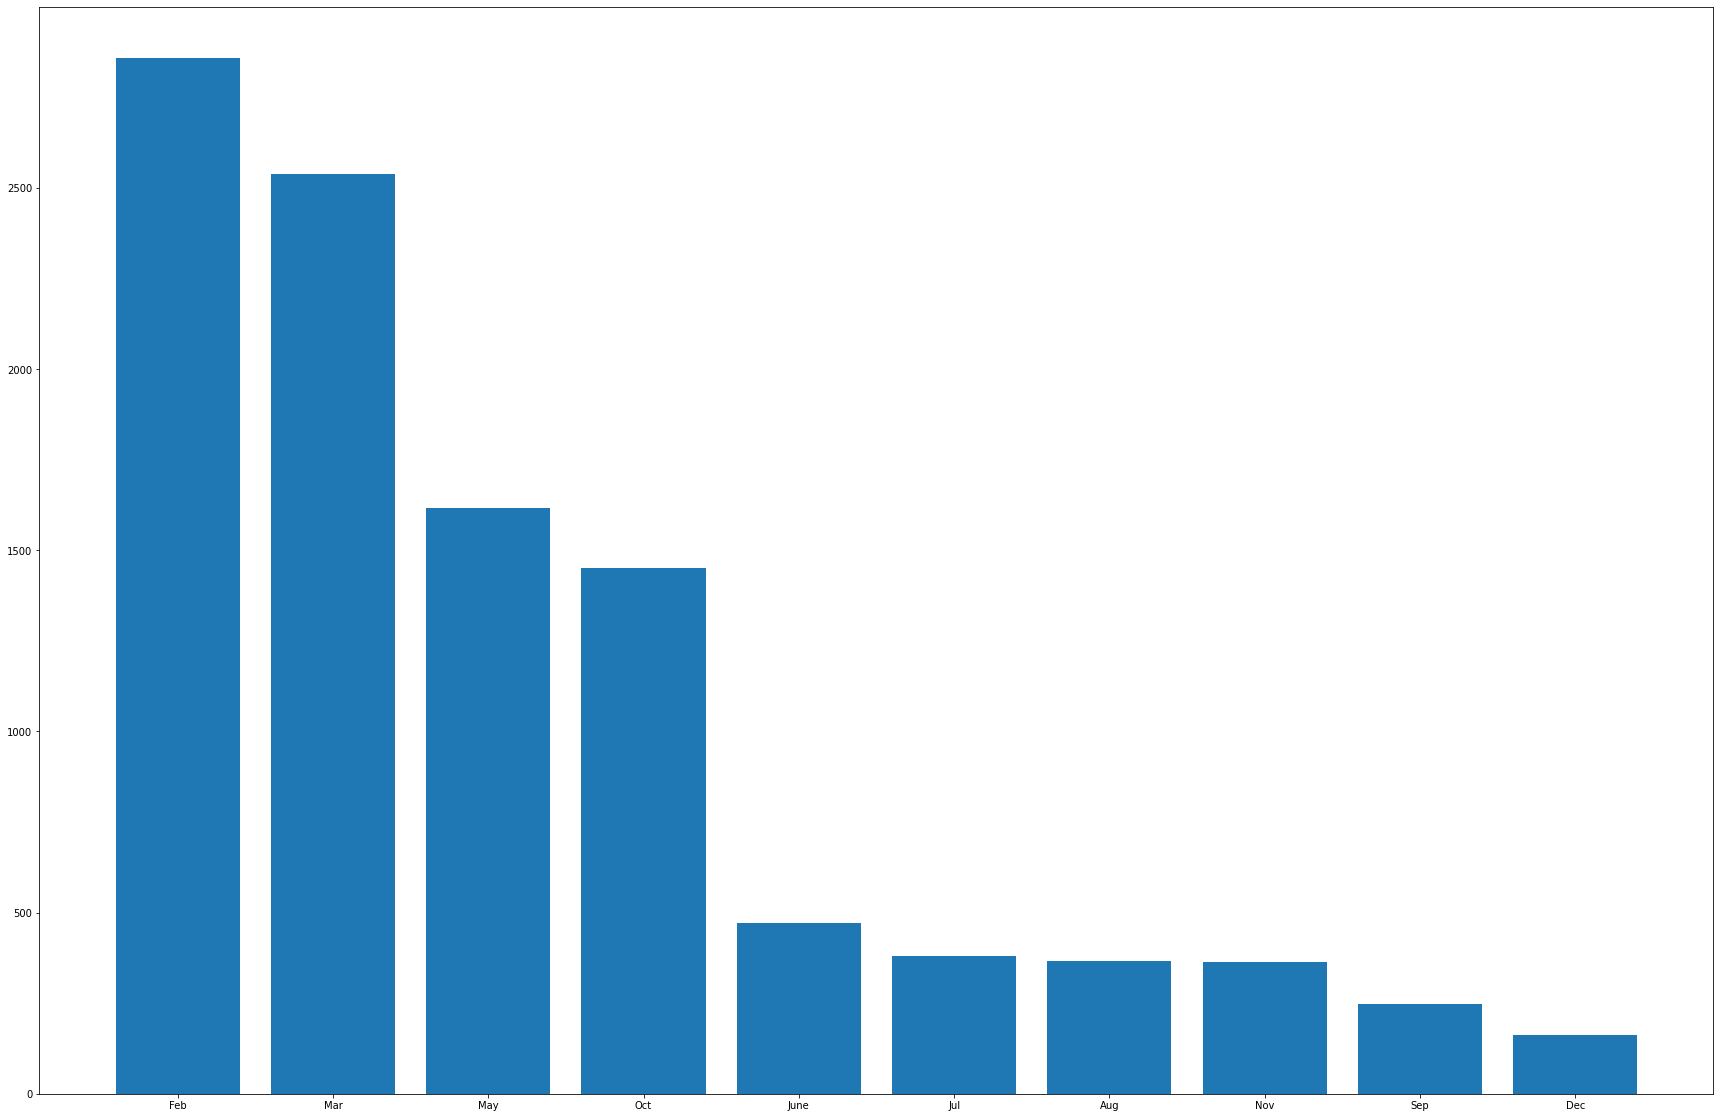

In [857]:
# Values by month
x_labels=data['Month'].dropna().unique()
y_labels=data['Month'].value_counts()
plt.bar(range(len(y_labels)), y_labels, align='center')
plt.xticks(range(len(x_labels)), x_labels, size='medium')
plt.show()
# most of the people are returning users

#### We want to see the distribution of the returning visitors compared to the new visitors

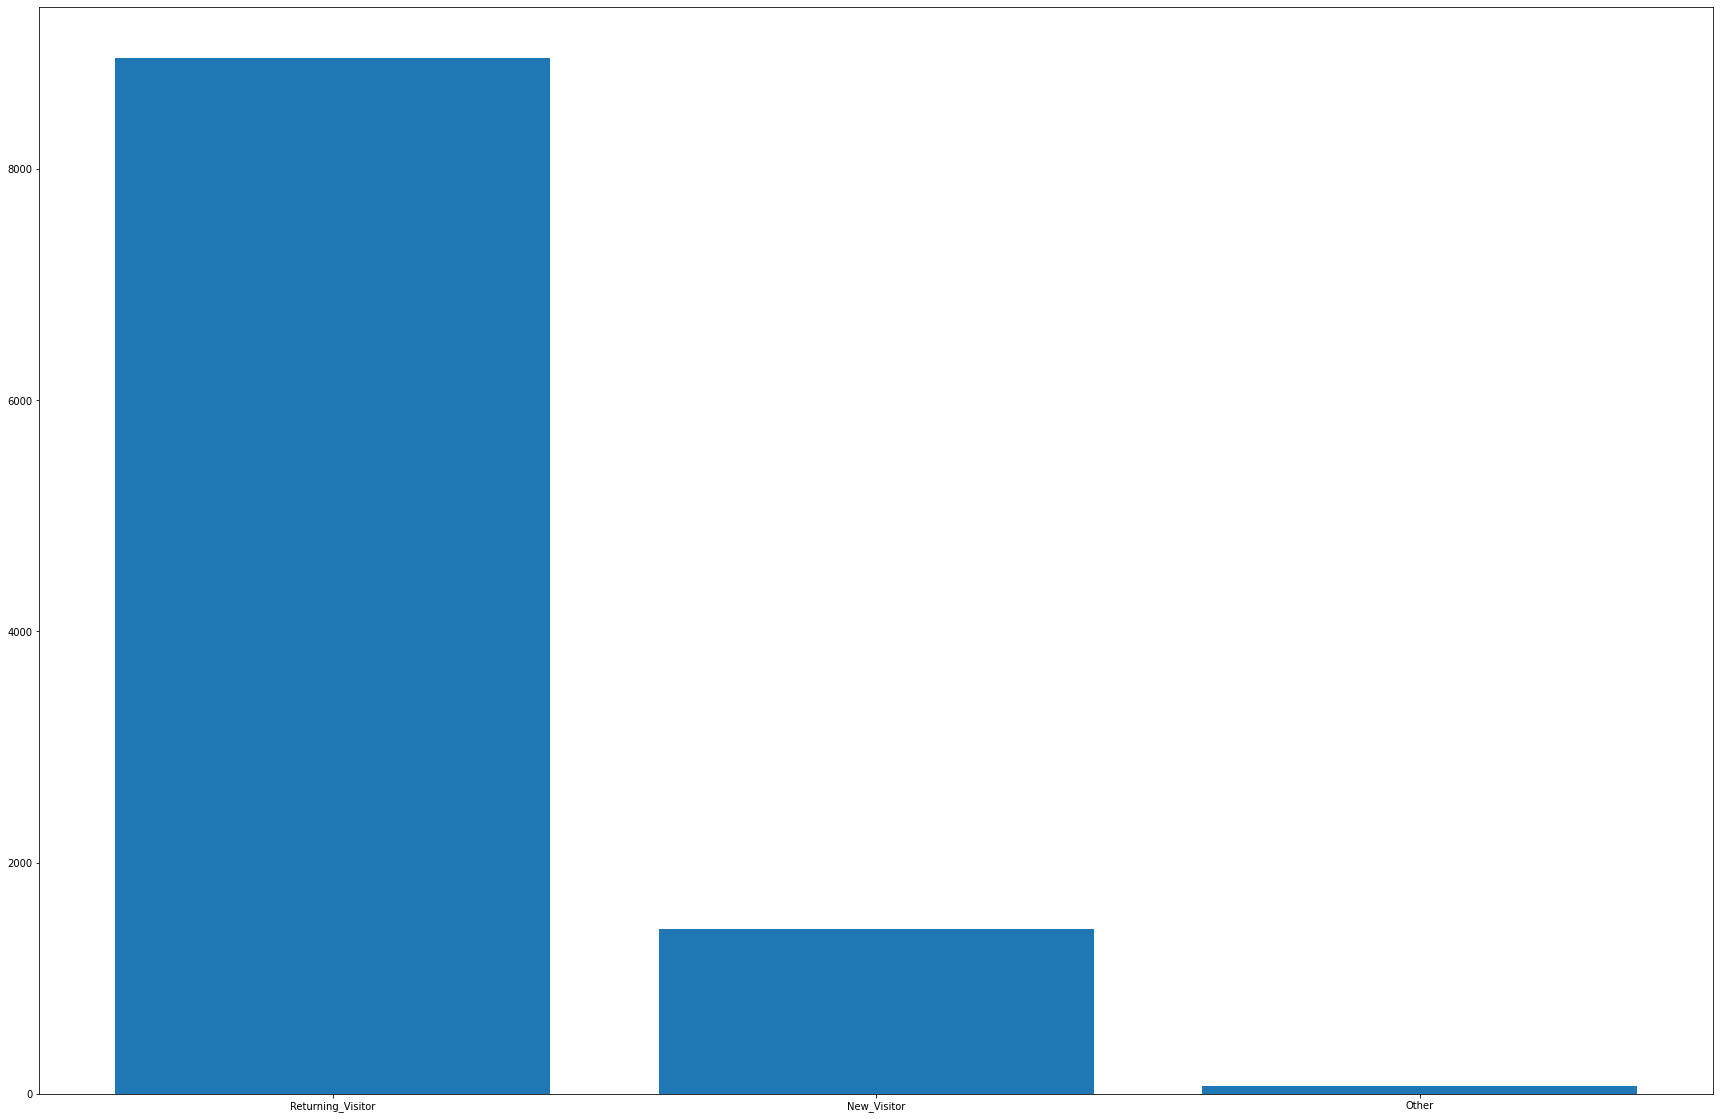

In [858]:
x_labels=data['user_type'].dropna().unique()
y_labels=data['user_type'].value_counts()
plt.bar(range(len(y_labels)), y_labels, align='center')
plt.xticks(range(len(x_labels)), x_labels, size='medium')
plt.show()
# most of the people are returning users

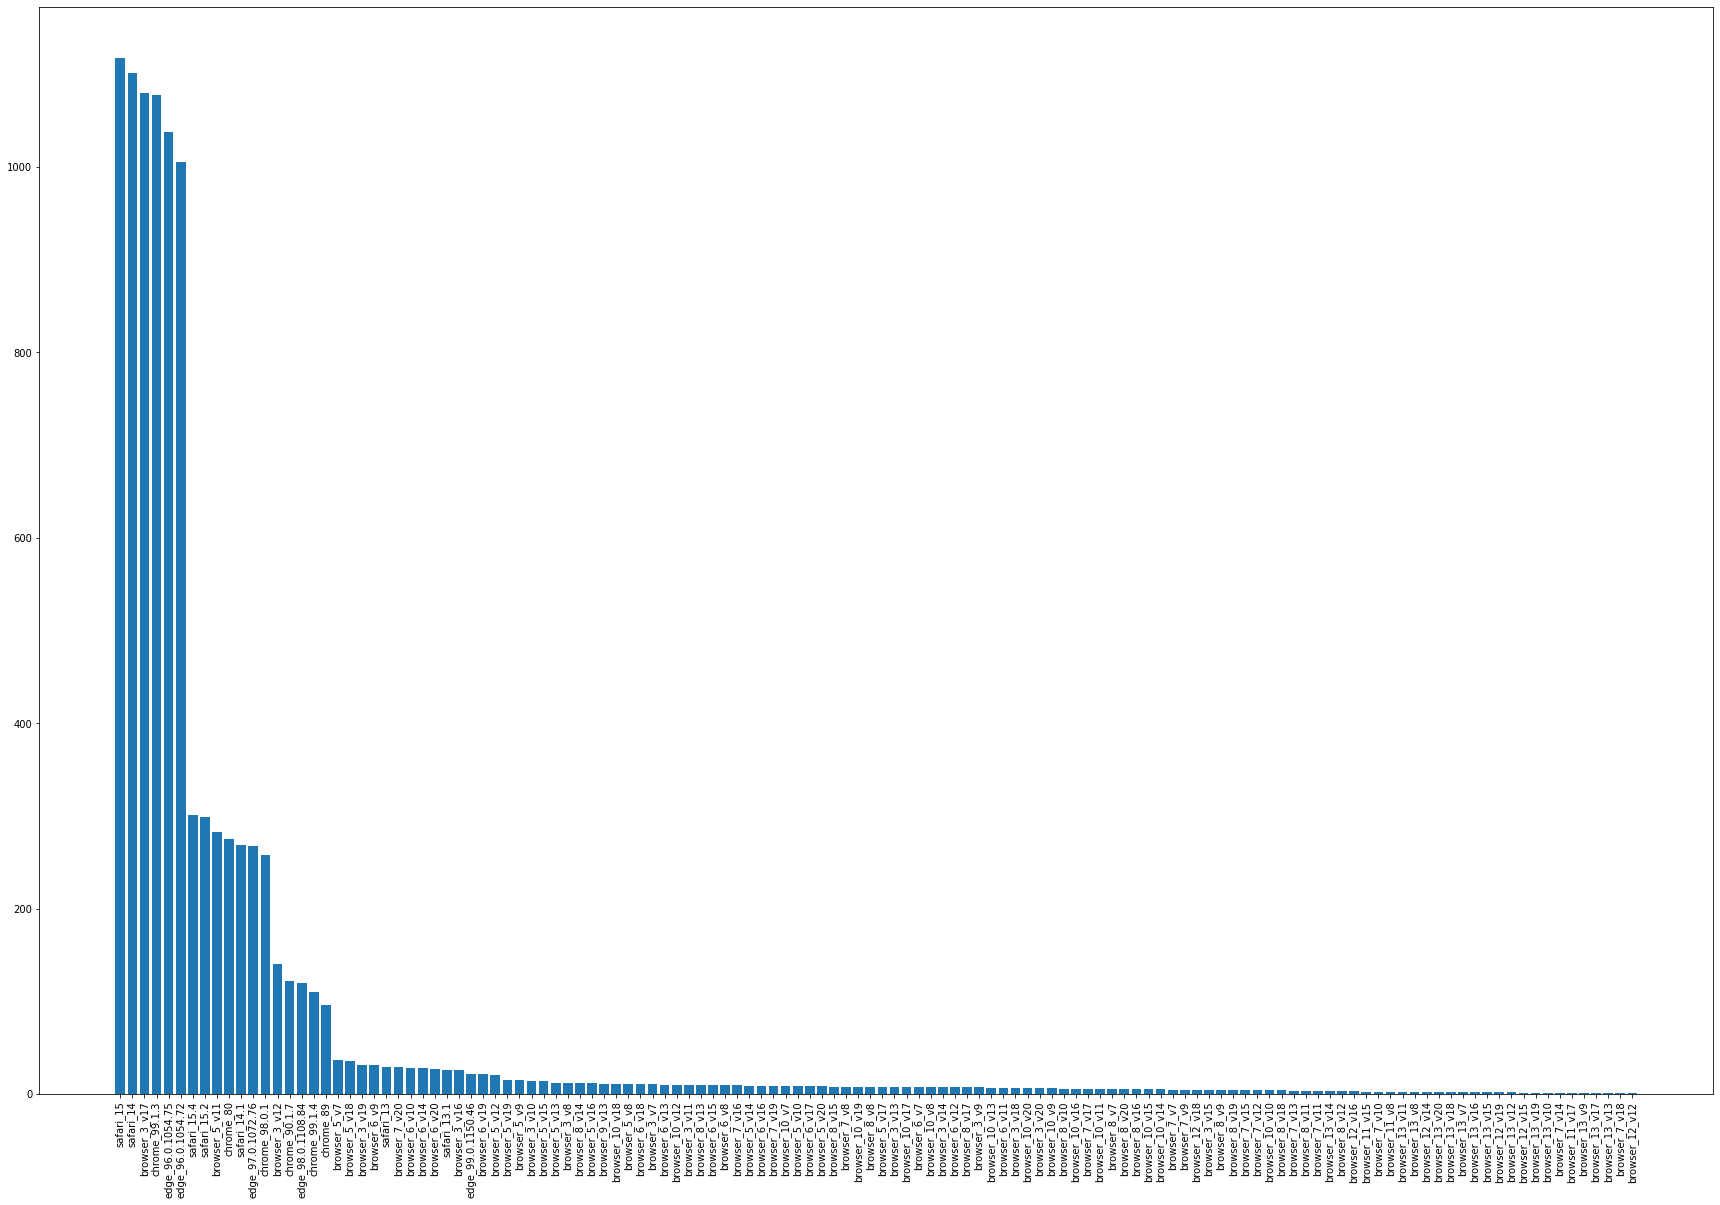

In [859]:
x_labels=data['internet_browser'].dropna().unique() 
y_labels=data['internet_browser'].value_counts()
plt.figure(figsize=(30,20))
plt.bar(range(len(y_labels)), y_labels, align='center')
plt.rcParams["figure.figsize"] = (30,20)
plt.xticks(range(len(x_labels)), x_labels, size='medium',rotation=90)
plt.show()


In [860]:
devices=data['device'].unique()
devices_count=data['device'].value_counts()
devices_count
df=data[['device','internet_browser']]
df


,device,internet_browser
0,1.0,safari_15
1,4.0,safari_14
2,3.0,browser_3_v17
3,2.0,chrome_99.1.3
4,2.0,edge_96.0.1054.75
...,...,...
10474,4.0,browser_6_v12
10475,3.0,chrome_98.0.1
10476,3.0,chrome_99.1.3
10477,2.0,chrome_80


#### Based on the following chart we can see that we have alot of internet browsers and we might need to group. we can see that we can group them by the browser name (The version is not that important to us)

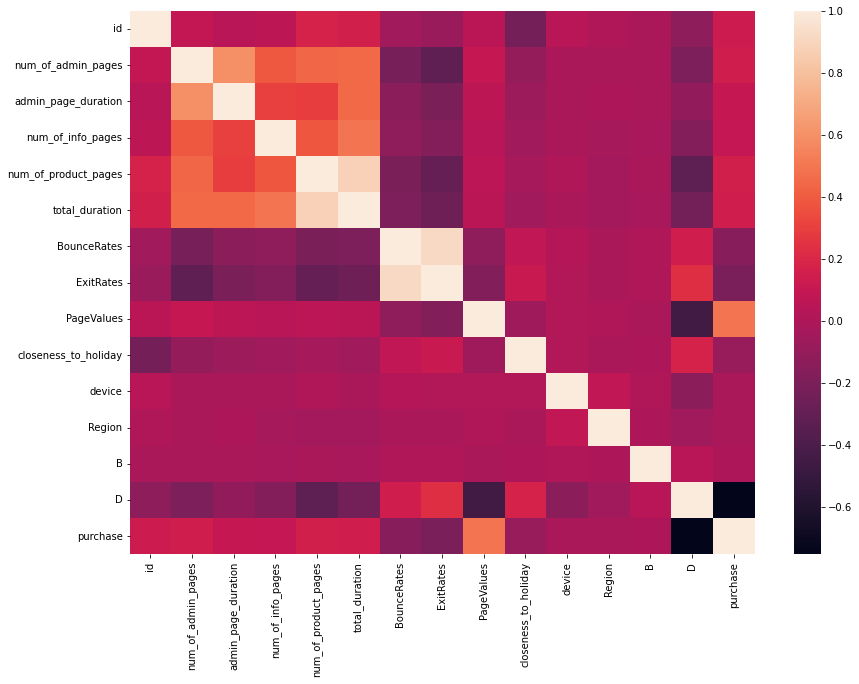

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,num_of_product_pages,total_duration,BounceRates,ExitRates,PageValues,closeness_to_holiday,device,Region,B,D,purchase
id,1.000000,0.082526,0.044857,0.066631,0.173407,0.151529,-0.054239,-0.077429,0.053881,-0.225908,0.043127,0.010513,-0.016671,-0.129515,0.124522
num_of_admin_pages,0.082526,1.000000,0.591505,0.383974,0.436619,0.447180,-0.222772,-0.317713,0.102648,-0.099734,-0.010604,-0.007737,-0.016465,-0.197337,0.145048
admin_page_duration,0.044857,0.591505,1.000000,0.297256,0.291797,0.445325,-0.141197,-0.202072,0.068009,-0.072091,-0.011671,-0.003730,-0.018782,-0.110871,0.097504
num_of_info_pages,0.066631,0.383974,0.297256,1.000000,0.382615,0.489927,-0.116471,-0.165944,0.046150,-0.051921,-0.011148,-0.032790,-0.021416,-0.167875,0.095563
num_of_product_pages,0.173407,0.436619,0.291797,0.382615,1.000000,0.877881,-0.202365,-0.292254,0.057020,-0.027799,0.000877,-0.043437,-0.019066,-0.326672,0.157167
total_duration,0.151529,0.447180,0.445325,0.489927,0.877881,1.000000,-0.192154,-0.265104,0.054231,-0.049315,-0.007370,-0.046022,-0.026004,-0.236378,0.145429
BounceRates,-0.054239,-0.222772,-0.141197,-0.116471,-0.202365,-0.192154,1.000000,0.911589,-0.116746,0.081161,0.024877,-0.008510,0.008744,0.147855,-0.150683
ExitRates,-0.077429,-0.317713,-0.202072,-0.165944,-0.292254,-0.265104,0.911589,1.000000,-0.172314,0.111041,0.015076,-0.009308,0.007393,0.231711,-0.207804
PageValues,0.053881,0.102648,0.068009,0.046150,0.057020,0.054231,-0.116746,-0.172314,1.000000,-0.062112,0.019302,0.010091,-0.012400,-0.447703,0.486404
closeness_to_holiday,-0.225908,-0.099734,-0.072091,-0.051921,-0.027799,-0.049315,0.081161,0.111041,-0.062112,1.000000,0.018269,-0.012651,-0.005234,0.171953,-0.083926


In [861]:
corr = data.corr()

plt.figure(figsize = (14,10))
sns.heatmap(corr, 
        xticklabels=data.corr().columns,
        yticklabels=data.corr().columns)
plt.show()
corr

#### Based on the correlation diagram below we can see that we might reduce the number of features we are going to use, this statment based on the correlation score we get between features

In [862]:
data.groupby(['closeness_to_holiday']).mean().sort_values(by='purchase',ascending=False)

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,num_of_product_pages,total_duration,BounceRates,ExitRates,PageValues,device,Region,B,D,purchase
closeness_to_holiday,,,,,,,,,,,,,,
0.0,5478.406899,2.448308,85.202277,0.526046,32.339520,1339.335349,0.020413,0.040867,6.325311,2.118418,3.162718,99.715344,3.959202,0.165327
0.2,2975.414966,1.669118,62.087281,0.289855,23.506944,1048.624100,0.028699,0.051883,4.281145,2.063380,2.918367,100.388319,3.435172,0.088435
0.6,2979.972414,1.211679,41.205323,0.294340,24.646643,895.628176,0.038347,0.063184,2.732476,2.150000,2.986207,99.126289,7.226965,0.075862
1.0,3089.756098,1.592920,45.318612,0.353448,33.470588,1119.577252,0.026659,0.052945,2.149979,2.146552,3.227642,99.290949,NaN,0.073171
0.4,2976.879397,1.375661,41.955186,0.354839,28.310881,1128.136278,0.038360,0.061747,2.201430,2.104167,3.110553,100.248700,5.034883,0.040201
0.8,3053.830827,1.015936,30.098968,0.232653,27.652344,981.356301,0.035113,0.062143,1.388950,2.255906,3.000000,99.648618,5.264853,0.033835


In [863]:
data.groupby(['Weekend']).mean().sort_values(by='purchase',ascending=False)

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,num_of_product_pages,total_duration,BounceRates,ExitRates,PageValues,closeness_to_holiday,device,Region,B,D,purchase
Weekend,,,,,,,,,,,,,,,
True,5357.556936,2.494954,85.386493,0.580889,33.169697,1310.843434,0.017961,0.037499,6.114784,0.054326,2.117848,3.146291,99.823636,4.546667,0.173499
False,5200.847780,2.271325,78.992425,0.479203,31.476006,1300.850707,0.023029,0.044453,5.841860,0.064401,2.124728,3.157600,99.758727,3.931560,0.148862


In [864]:
data.groupby(['Region']).mean()['purchase'].sort_values()

Region
8.0    0.135501
6.0    0.142446
3.0    0.146282
7.0    0.148092
4.0    0.150602
2.0    0.159574
1.0    0.160010
9.0    0.167053
5.0    0.175182
Name: purchase, dtype: float64

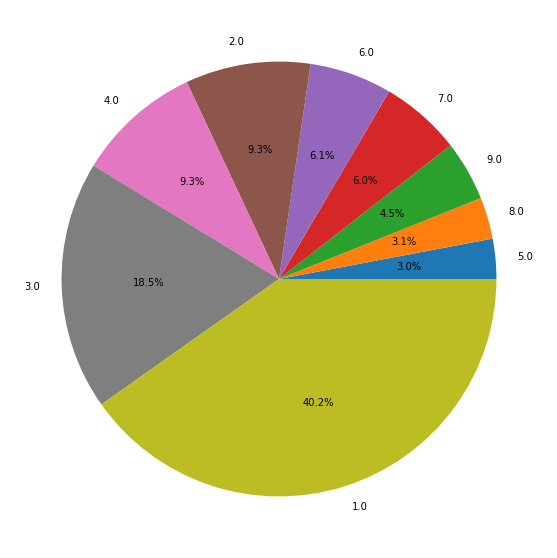

In [865]:
purchase_by_region=data.groupby(['Region']).sum()['purchase'].sort_values()
fig = plt.figure(figsize=(10,10))
fig.patch.set_facecolor('white')
plt.pie(purchase_by_region,labels=purchase_by_region.index,autopct='%1.1f%%')
plt.show()

# Part 2 - Preprocessing

#### Utils functions

In [866]:
def get_browser_name(name: str) -> str:
    return name.split('_')[0]

def change_bool_to_binary(label: str) -> int:
  return 1 if label else 0

def remove_minutes_string(cell_data: object) -> str:
    return cell_data.replace(' minutes','')
  
def drop_columns(data: pd.DataFrame,columns: list[str]) -> pd.DataFrame:
  return data.drop(columns=columns)
  
def plot_principal_components(X: np.array) -> np.array:
    pca=PCA()
    pca.fit(X)
    print('here')
    pca_explained_var=pca.explained_variance_ratio_
    pca_cumsum_var=pca_explained_var.cumsum()
    print(f'Number of components:\n {pca.components_}\n' )
    print(f'Explained variance ratio:\n {pca_explained_var}\n' )
    print(f'Cumulative Sum of the explained variance ratio:\n {pca_cumsum_var}\n')
    plt.plot(pca_cumsum_var)
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');
     
def dim_reduction_pca(X: np.array,n_components: int) -> np.array:
  pca = PCA(n_components)
  pca.fit(X)
  X_pca = pca.transform(X)
  print(pca.n_components_)
  print("original shape:", X.shape)
  print("transformed shape:", X_pca.shape)
  return X_pca
  
def normalize_data(X: np.array) -> np.array:
  scaler = StandardScaler().fit() # scalar=MinMaxScaler()
  return scaler.transform(X)

def feature_selection_filter():
  pass

def data_transform_dummy_vars(data: pd.DataFrame,columns: list[str]) -> pd.DataFrame:
  return pd.get_dummies(data=data,columns=columns,drop_first=True)
   
def get_most_frequent(column: str)-> int:
  return data[column].value_counts().sort_values(ascending=False).index[0]
    

In [867]:
# cleaning the data remove unnecessary strings and casting str to floats
data['Weekend']=data['Weekend'].apply(change_bool_to_binary) 
data['internet_browser']=data['internet_browser'].astype(str).apply(get_browser_name)
data['info_page_duration']= (data['info_page_duration'].astype(str).apply(remove_minutes_string)).astype(float)
data['product_page_duration']= (data['product_page_duration'].astype(str).apply(remove_minutes_string)).astype(float)

In [868]:
# displaying the number of NaN values in each column
data.isna().sum()

id                           0
num_of_admin_pages         605
admin_page_duration        413
num_of_info_pages          687
info_page_duration         317
num_of_product_pages       403
product_page_duration      621
total_duration            4753
BounceRates                 22
ExitRates                   26
PageValues                  27
closeness_to_holiday       496
Month                       25
device                     323
internet_browser             0
Region                      19
user_type                   23
Weekend                      0
A                          706
B                           23
C                           23
D                        10374
purchase                     0
dtype: int64

In [869]:
# removing columns and rows with NaN values
# D column has 10374 missing values out of 10479 which is 0.989 percent of the total
data=data.drop(['D'],axis=1)
# 23
data



,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,...,Month,device,internet_browser,Region,user_type,Weekend,A,B,C,purchase
0,0,0.0,0.0,0.0,0.0,1.0,0.000000,NaN,0.200000,0.200000,...,Feb,1.0,safari,1.0,Returning_Visitor,0,c_1,118.880094,log202,0
1,1,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.200000,0.200000,...,Feb,4.0,safari,9.0,Returning_Visitor,0,c_3,113.358423,log404,0
2,2,0.0,0.0,0.0,NaN,NaN,627.500000,627.500000,0.020000,0.050000,...,Feb,3.0,browser,1.0,Returning_Visitor,1,c_4,121.507695,log202,0
3,3,0.0,0.0,0.0,0.0,19.0,154.216667,154.216667,0.015789,0.024561,...,Feb,2.0,chrome,1.0,Returning_Visitor,0,c_3,93.747176,log_100,0
4,4,0.0,0.0,0.0,0.0,1.0,0.000000,NaN,0.200000,0.200000,...,Feb,2.0,edge,3.0,Returning_Visitor,0,c_3,99.545824,log202,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10474,10474,3.0,145.0,0.0,0.0,53.0,1783.791667,1928.791667,0.007143,0.029031,...,Dec,4.0,browser,1.0,Returning_Visitor,1,c_1,79.548460,log400,0
10475,10475,0.0,0.0,0.0,0.0,5.0,465.750000,NaN,0.000000,0.021333,...,Nov,3.0,chrome,1.0,Returning_Visitor,1,c_8,99.457255,log202,0
10476,10476,0.0,0.0,0.0,0.0,6.0,184.250000,NaN,0.083333,0.086667,...,Nov,3.0,chrome,1.0,Returning_Visitor,1,c_13,94.417344,log8080,0
10477,10477,4.0,75.0,0.0,0.0,15.0,346.000000,NaN,0.000000,0.021053,...,Nov,2.0,chrome,3.0,Returning_Visitor,0,c_11,108.919057,log400,0


In [870]:
# #we will start to drop some col with high correlation
# We have 4753 missing values in total_duration column. we will drop this column and work with num_of_product_pages. which has the highest correlation with this feature.
data = data.drop(columns=['total_duration'],inplace=False)
data = data.drop(columns=['ExitRates'],inplace=False)
data = data.drop(columns=['num_of_admin_pages'],inplace=False)



In [871]:
(data['user_type']=='Other').sum()/data.shape[0]

0.006870884626395649

In [872]:
# there are 87 categories in this column and we dont know what they represent - we will drop it
len(data['A'].unique())
data = data.drop(columns=['A'],inplace=False)

In [873]:

data['BounceRates'].fillna(data['BounceRates'].median(), inplace = True) # only 22 missing values
data['admin_page_duration'].fillna(data['admin_page_duration'].median(), inplace = True) # only 22 missing values
data['info_page_duration'].fillna(data['info_page_duration'].median(), inplace = True) # only 22 missing values
data['product_page_duration'].fillna(data['product_page_duration'].median(), inplace = True)
data['num_of_info_pages'].fillna(data['num_of_info_pages'].median(), inplace = True) # only 22 missing values
data['num_of_product_pages'].fillna(data['num_of_product_pages'].median(), inplace = True)
data['closeness_to_holiday'].fillna(data['closeness_to_holiday'].median(), inplace = True) # only 22 missing values
data['PageValues'].fillna(data['PageValues'].median(), inplace = True) # only 22 missing values
data['device'].fillna(get_most_frequent('device'), inplace = True)
data['Region'].fillna(get_most_frequent('Region'), inplace = True)
data['Month'].fillna(get_most_frequent('Month'), inplace = True)
data['user_type'].fillna(get_most_frequent('user_type'), inplace = True)
data['B'].fillna(get_most_frequent('B'), inplace = True)
data['C'].fillna(get_most_frequent('C'), inplace = True)
# (data['PageValues']==0).sum()
# (data.isna().sum(axis=1).sort_values(ascending=False)>=6).sum()
print(data.isna().sum())
data
# data = data[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
# # boxplot_diagram_1 = data.boxplot(co, figsize=(5,5))
# boxplot= data.boxplot(column='PageValues',figsize=(5,5))

id                       0
admin_page_duration      0
num_of_info_pages        0
info_page_duration       0
num_of_product_pages     0
product_page_duration    0
BounceRates              0
PageValues               0
closeness_to_holiday     0
Month                    0
device                   0
internet_browser         0
Region                   0
user_type                0
Weekend                  0
B                        0
C                        0
purchase                 0
dtype: int64


TypeError: can only concatenate str (not "float") to str

Transforming all the objects to dummy var

In [ ]:
data['user_type'].replace({"Other":get_most_frequent('user_type')},inplace=True)

In [ ]:
data=data_transform_dummy_vars(data,['internet_browser','Month','C','user_type'])
data['purchase']

0        0
1        0
2        0
3        0
4        0
        ..
10474    0
10475    0
10476    0
10477    0
10478    0
Name: purchase, Length: 10479, dtype: int64

Now we need to reduce the dimentions of the tables

In [ ]:
data.shape

(10479, 33)

here
Number of components:
 [[ 9.89749935e-01  4.32508948e-03  3.92124003e-05 ...  2.72643020e-07
  -9.16572166e-07 -5.45639772e-06]
 [-1.42808022e-01  3.30339018e-02  2.34347237e-04 ... -3.49291140e-06
   6.72919942e-07  2.25846010e-05]
 [ 4.55856889e-04  9.64390699e-01  1.85023234e-03 ...  5.41351904e-06
  -1.10907652e-05 -1.42737279e-04]
 ...
 [ 7.08421460e-05  1.14492294e-05  2.71519174e-04 ...  2.01668249e-03
   7.28621982e-04 -1.52211618e-02]
 [-1.38586900e-05 -9.61786373e-06  5.22713915e-04 ... -4.81922075e-04
  -8.57897716e-04  5.20686024e-03]
 [-5.60198709e-08  1.63490800e-05  1.47317659e-03 ... -1.02096484e-03
  -6.56557313e-04 -1.90685634e-02]]

Explained variance ratio:
 [7.23025595e-01 2.73423323e-01 2.17319486e-03 1.29434198e-03
 4.78091161e-05 2.70652944e-05 7.91596355e-06 4.50244356e-07
 7.03169678e-08 6.64475514e-08 2.03956528e-08 1.81388807e-08
 1.45478215e-08 1.34918994e-08 1.30516655e-08 1.29387805e-08
 1.28609157e-08 1.23772257e-08 8.99228189e-09 7.38570243e-09
 7.

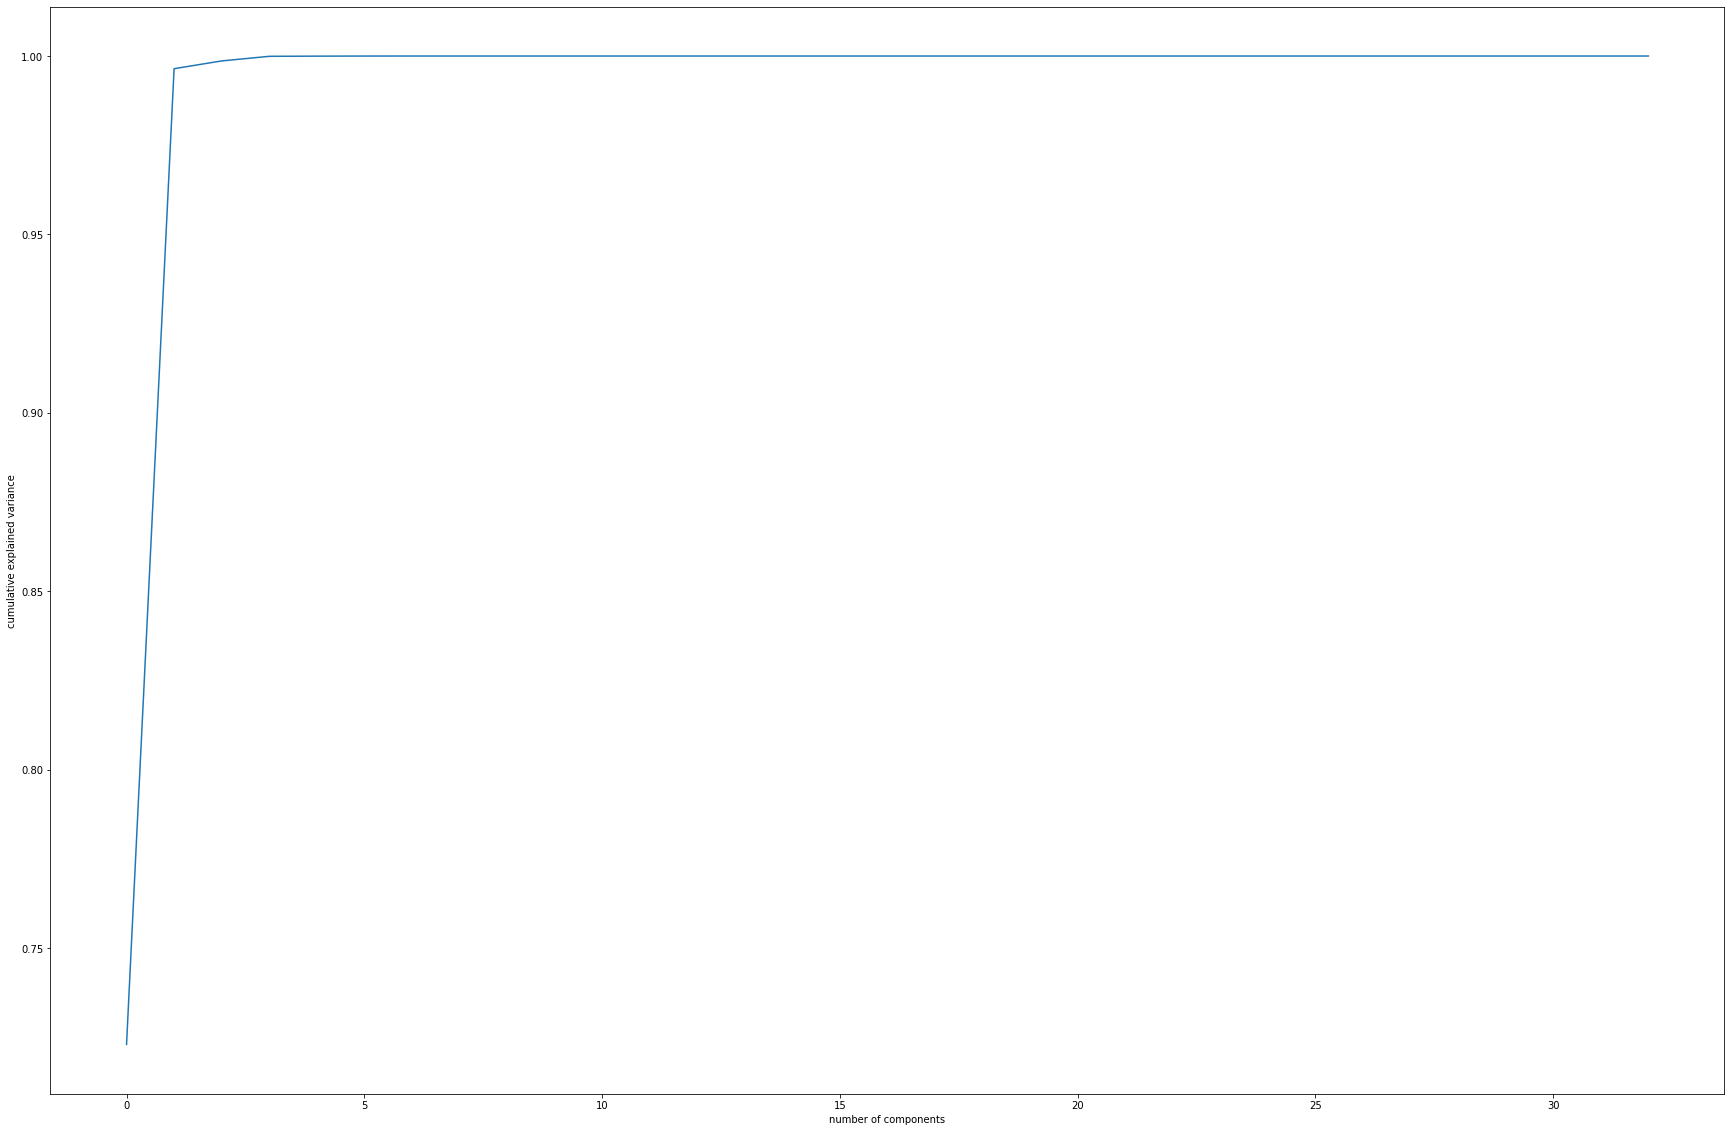

In [ ]:
X = data.iloc[:,:].values
y = data.iloc[:,-1]
X
plot_principal_components(X)


In [ ]:
data=dim_reduction_pca(X,5)

5
original shape: (10479, 33)
transformed shape: (10479, 5)


## Part 3 - Models Fitting and Scores

#### Utils functions

In [ ]:
def logistic_regression_model(X_train: np.array,y_train: np.array) -> LogisticRegression:
  log_reg = LogisticRegression(C=1,penalty='l2',solver='liblinear')
  log_reg.fit(X_train,y_train)  
  return log_reg

def knn_model(X_train: np.array,y_train: np.array)->KNeighborsClassifier:
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train,y_train)
    return knn
  
def random_forrest_model(X_train: np.array,y_train: np.array)-> RandomForestClassifier:
    rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
    rf.fit(X_train,y_train)
    return rf
  
def svm_model(X_train: np.array,y_train: np.array)-> SVC:
  svm = SVC(gamma='scale',probability=True)
  svm.fit(X_train,y_train)
  return svm

def get_models_scores(models: list[Callable:[np.array,np.array]],X_train: np.array,y_train: np.array)->None:
  for model in models:
    model_after_fit=model(X_train,y_train)
    y_predict=model_after_fit.predict(X_test)
    y_predict_proba=model_after_fit.predict_proba(X_test)[:,1]
    accuracy_score=accuracy_score(y_test,y_predict)
    fpr, tpr, thresholds = roc_curve(X_test,y_predict_proba)
    test_auc = auc(fpr, tpr)
    print(f'Model name: {model.__name__} ,Accuracy: {accuracy_score}, AUC: {test_auc}\n')
    
def roc_auc(y_test, y_prob, clfname):
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.figure(figsize = (5,5))
    plt.title('ROC for ' + clfname)
    plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = %0.5f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle = '--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

NameError: name 'SVC' is not defined

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
models=[logistic_regression_model,knn_model,random_forrest_model]
get_models_scores(models)

# Part 4 - Models Evaluation

#### Utils functions

In [ ]:
def plot_confusion_matrix(classifier,labels,prediction,display_labels):
  cm = confusion_matrix(labels,prediction)
  cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=display_labels)
  plt.plot(cm_display,title=f'Confusion Matrix {cm}')
  plt.show()
  
def plot_roc_curve(classifier,X,y):
    y_pred=classifier.predict(X)
    fpr,tpr,thresholds=roc_curve(y,y_pred)
    auc=auc(fpr,tpr)
    plt.plot(fpr,tpr)
    plt.plot([0, 1], [0, 1], linestyle = '--')
    plt.title('ROC curve')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()
    
def K_fold_cross_validation(classifier,X,y,k):
    kf = KFold(n_splits=k,shuffle=True)
    kf.get_n_splits(x)
    accuracy=[]
    for train_index,test_index in kf.split(X):
        X_train,X_test=X.iloc[train_index],X.iloc[test_index]
        y_train,y_test=y.iloc[train_index],y.iloc[test_index]
        classifier.fit(X_train,y_train)
        y_pred=classifier.predict(X_test)
        accuracy.append(accuracy_score(y_test,y_pred))
    return accuracy
# def feature_importance(classifier,X,y,title):
#   feature_importance = classifier.feature_importances_
#   sorted_idx = np.argsort(feature_importance)
#   pos = np.arange(sorted_idx.shape[0]) + .5
#   plt.rcParams["figure.figsize"] = (12,8)
#   plt.bar(pos, feature_importance[sorted_idx], align='center')
#   plt.xticks(pos, np.array(X.columns)[sorted_idx])
#   plt.title(title)
#   plt.xticks(rotation = 45) 
#   plt.show()
  
# def grid_search_roc_auc(classifier,params,X,y):
#   gscv=GridSearchCV(classifier,params,scoring='roc_auc')
#   gscv.fit(X, y)
#   predict_proba=gscv.predict_proba(X_bos_test)[:,1]
#   best_params = gscv.best_params_
#   best_score = gscv.best_score_
#   fpr, tpr, thresholds = roc_curve(X,predict_proba)
#   test_auc = auc(fpr, tpr)

#### Confusion matrix

In [ ]:
plot_confusion_matrix(classifier,labels,prediction,display_labels)
K_fold_cross_validation(classifier,X,y,k)

## Part 5 - Prediction

#### Utils functions

In [ ]:
def save_to_csv(data,file_name):
  data.to_csv(f'{file_name}.csv');

In [ ]:
test_data=pd.read_csv("test.csv")
classifier=chossen_classifier
classifier.fit()
y_proba=classifier.predict_proba(X_test)[:,1]
y_pred=classifier.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_proba

In [ ]:
submission_data=pd.DataFrame(data=y_proba,index=X_test.index)
save_to_csv(submission_data,'Submission_group_16')

# PROJECT PIPELINE

In [ ]:
def pipeline_data_exploration():
  display(data)
  display(data.head(10))
  display(data.describe())
  display(data.shape)

def pipeline_preprocessing():
  pass
def pipeline_feature_engineering():
  pass
def pipeline_model_selection():
  pass
def pipeline_model_training():
  pass
def pipeline_model_evaluation():
  pass
def pipeline_model_prediction():
  pass
def pipeline_model_submission():
  pass

def run_pipeline():
  pipeline_data_exploration()
  pipeline_preprocessing()
  pipeline_model_selection()
  pipeline_model_training()
  pipeline_model_evaluation()
  pipeline_model_prediction()
  pipeline_model_submission()

In [ ]:
# remove the comment on the next line to run the entire project's pipeline !!!
# run_pipepline()